<a href="https://colab.research.google.com/github/DatNT146/Dat/blob/main/EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo các thư viện
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
listdata_train=[]
listdata_validation=[]
listdata_test=[]
dict={'Dat':[0],'Duy':[1]}

In [ ]:
#khai bien doc dia chi
train_data ='drive/MyDrive/Colab Notebooks/ANN/BT1/Training'
test_data='drive/MyDrive/Colab Notebooks/ANN/BT1/Test'

In [ ]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[6]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [ ]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)

In [ ]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(80, 1)

In [ ]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])
x_test.shape

(20, 150, 150, 3)

In [ ]:
yname=y_train.flatten()

In [ ]:
class_names=['Dat','Duy']
x_pre=x_test
y_pre=y_test
y_pre

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

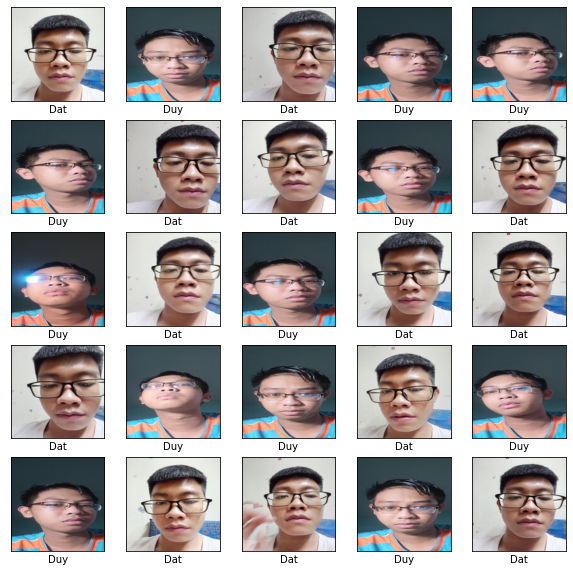

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [ ]:
from keras.utils import np_utils
x_train=x_train.reshape(80,67500)
x_test=x_test.reshape(20,67500)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,2)
y_test= np_utils.to_categorical(y_test,2)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(67500,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 35,086,850
Trainable params: 35,086,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=90,epochs=200,verbose=1)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.7902 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 423ms/step - loss: 94.7346 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 403ms/step - loss: 617.8569 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 433ms/step - loss: 2.4301 - accuracy: 0.7375
Epoch 5/200
1/1 [==============================] - 0s 407ms/step - loss: 87.4928 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 404ms/step - loss: 53.1578 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 403ms/step - loss: 15.7787 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 383ms/step - loss: 30.3079 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 389ms/step - loss: 0.4238 - accuracy: 0.9375
Epoch 10/200
1/1 [==============================] - 0s 400ms/step - loss: 0.0000e+00 - accuracy: 1.0000
E

In [ ]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.0
Test accuary 1.0


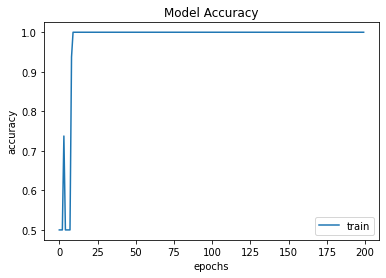

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

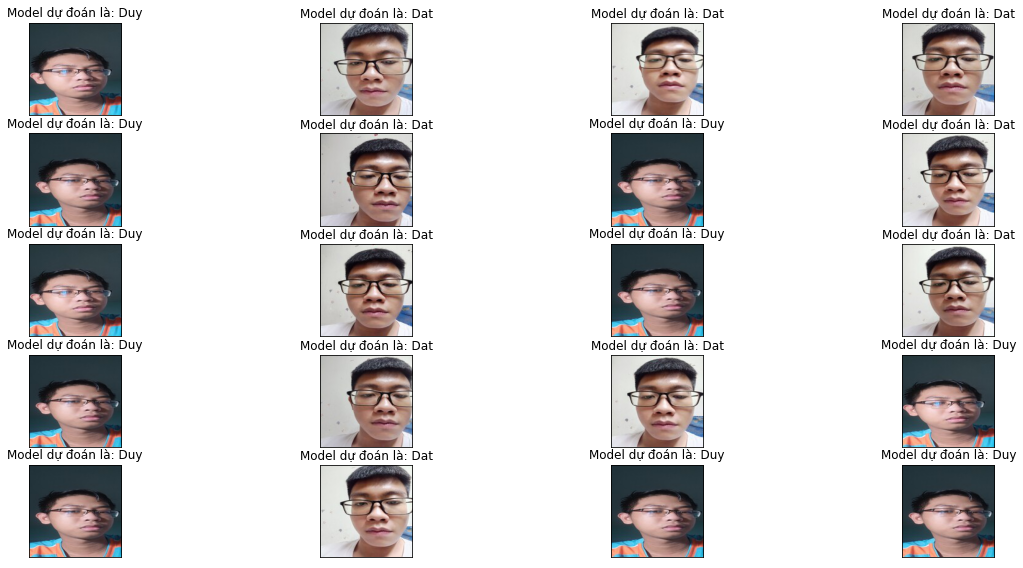

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Model dự đoán là: " + str(class_names[np.argmax(model.predict(x_pre[i].reshape((-1,67500))))]))
plt.show()